All data:  376884
Train size:  226125
Test size:  75384
Validate size:  75375
              date home_team away_team    home_score    away_score tournament  \
count        41876     41876     41876  41876.000000  41876.000000      41876   
unique       15232       308       306           NaN           NaN        112   
top     2012-02-29    brazil   uruguay           NaN           NaN   friendly   
freq            66       570       543           NaN           NaN      17136   
mean           NaN       NaN       NaN      1.744293      1.186503        NaN   
std            NaN       NaN       NaN      1.752248      1.403053        NaN   
min            NaN       NaN       NaN      0.000000      0.000000        NaN   
25%            NaN       NaN       NaN      1.000000      0.000000        NaN   
50%            NaN       NaN       NaN      1.000000      1.000000        NaN   
75%            NaN       NaN       NaN      2.000000      2.000000        NaN   
max            NaN       NaN   

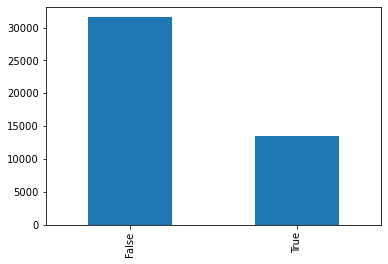

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files('martj42/international-football-results-from-1872-to-2017', path='.', unzip=True)

results = pd.read_csv('results.csv')

#brak wierszy z NaN
results.dropna()

#normalizacja itp
for collumn in ['home_team', 'away_team', 'tournament', 'city', 'country']:
    results[collumn] = results[collumn].str.lower()
    
# Podział zbioru 6:1:1
train, test = train_test_split(results, test_size= 1 - 0.6)

valid, test = train_test_split(test, test_size=0.5) 

print("All data: ", results.size)
print("Train size: ", train.size)
print("Test size: ", test.size)
print("Validate size: ", valid.size)
print(results.describe(include='all'))

# sprawdzenie czy cały dataset oraz podział na podzbiory jest równy
print(train.size+test.size+valid.size)

for col in results.columns:
    column = results[col].value_counts().plot(kind="bar")
    print("\n", col)
    print(column)